In [2]:
import numpy as np
import requests
import polyline
import matplotlib.pyplot as plt
import gmplot 
import seaborn as sns

To authorize the app, follow the link, sign in with Strava and then authorize the app to access workout data. 

In [3]:
 #http://www.strava.com/oauth/authorize?client_id=50142&response_type=code&redirect_uri=http://localhost/exchange_token&approval_prompt=force&scope=activity:read

#After going to the link, you will get a url like this, where you will want to take out the string after code

#http://localhost/exchange_token?state=&code=REMOVED&scope=read,activity:read

From here, you will take your code and plug into the URL below to fully authenticate the user, following the next two cells to get all of the users activities. For this, I assumed the user had fewer than 100 for my own case.

In [46]:
url= "https://www.strava.com/oauth/token?client_id=%s&client_secret=REMOVED&code="% 50142 + code +"&grant_type=authorization_code&scope=activity:read"
requests.post(url).json()
print("Success")

Success


In [5]:
url = "https://www.strava.com/api/v3/athlete/activities"
headers = {'Authorization': 'Bearer REMOVED'} 
data = {"per_page": 100, "page": 1}
response = requests.get(url,headers=headers,data=data)

activities = response.json()

In [14]:
#Segment data by type and location, based off latitude
runs = [i for i in activities if i['type'] == 'Run']
rides = [i for i in activities if i['type'] == 'Ride']

runs_bos = [i for i in runs if i['start_latitude'] > 40 and i['start_latitude'] < 43]
runs_bel = [i for i in runs if i['start_latitude'] > 43]
rides_bos = [i for i in rides if i['start_latitude'] > 40 and i['start_latitude'] < 43]
rides_bel = [i for i in rides if i['start_latitude'] > 43]


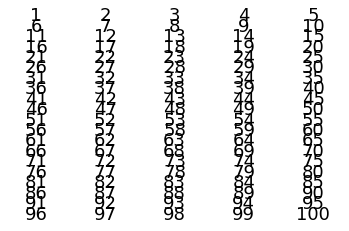

In [15]:
#Grid format for route graph
row = len(activities)//5 + 1
col = 5
for i in range(1, len(activities)+1):
    plt.subplot(row, col, i)
    plt.axis('off')
    plt.text(0.5, 0.5, str(i),
             fontsize=18, ha='center')



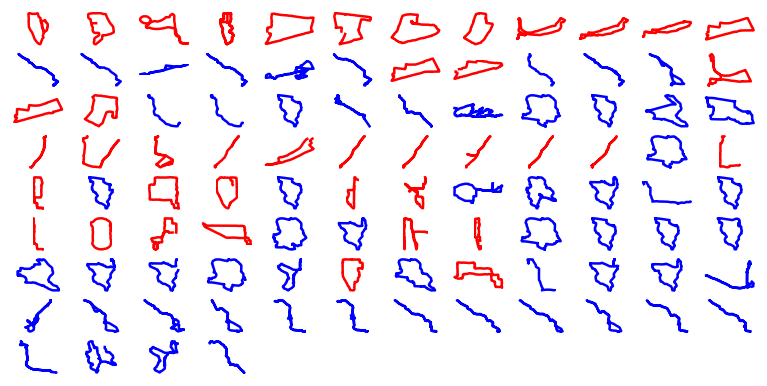

In [44]:
# Route Graph
plt.figure(num=None, figsize=(8, 4), dpi=120, facecolor='w', edgecolor='k')


col = len(activities)//9 + 1
row = 9
for i in range(len(activities)):
    plt.subplot(row, col, i+1,aspect='equal')
    color = 'r-' if activities[i]['type'] == 'Run' else 'b-'
    coordinates = polyline.decode(activities[i]['map']['summary_polyline'])

    ride_longitudes = [coordinate[1] for coordinate in coordinates]
    ride_latitudes = [coordinate[0] for coordinate in coordinates]
    plt.axis('off')
    plt.plot(ride_longitudes, ride_latitudes, color, alpha=1)

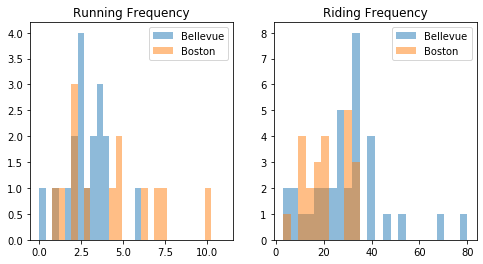

In [39]:
#Distance Distribution
def metomi(meters): return meters * 0.00062137

def dist(_list):
    dists = []
    for i in _list:
        dists.append(metomi(i['distance']))
    return (dists)

f, axs = plt.subplots(2,2,figsize=(8,4))
plt.subplot(1, 2, 1)
bins = np.linspace(0, 11, 30 )
plt.title("Running Frequency")
plt.hist(dist(runs_bel ),label = "Bellevue",bins = bins
,alpha=0.5)
plt.hist(dist(runs_bos),label = "Boston",bins = bins,alpha=0.5)
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.title("Riding Frequency")
bins = np.linspace(3, 80, 25)
plt.hist(dist(rides_bel),label = "Bellevue",bins = bins
,alpha=0.5)
plt.hist(dist(rides_bos),label = "Boston",bins = bins,alpha=0.5)
plt.legend(loc='best')

plt.show()